In [1]:
!pip list

Package           Version
----------------- -----------
asttokens         3.0.0
colorama          0.4.6
comm              0.2.2
contourpy         1.3.1
cycler            0.12.1
debugpy           1.8.13
decorator         5.2.1
docutils          0.21.2
exceptiongroup    1.2.2
executing         2.2.0
fonttools         4.56.0
ipykernel         6.29.5
ipython           8.34.0
jedi              0.19.2
jsonpickle        4.0.2
jupyter_client    8.6.3
jupyter_core      5.7.2
kiwisolver        1.4.8
matplotlib        3.10.1
matplotlib-inline 0.1.7
nest-asyncio      1.6.0
numpy             2.2.3
packaging         24.2
pandas            2.2.3
parso             0.8.4
pillow            11.1.0
pip               23.0.1
platformdirs      4.3.7
prompt_toolkit    3.0.50
psutil            7.0.0
pure_eval         0.2.3
Pygments          2.19.1
pyparsing         3.2.1
python-dateutil   2.9.0.post0
pytz              2025.1
pywin32           310
pyzmq             26.3.0
setuptools        65.5.0
six           


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv("mcginley_data.csv")

In [72]:
df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0
3,-1,100,RAINFOREST_RESIN,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,4.0
4,-1,200,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,4.0


In [73]:
to_plot = [(timestamp,product,mid_price) for timestamp, product, mid_price in zip(df['timestamp'], df['product'], df['mid_price'])]

In [74]:
to_plot[:5]

[(0, 'RAINFOREST_RESIN', 10003.0),
 (0, 'KELP', 2028.5),
 (100, 'KELP', 2026.5),
 (100, 'RAINFOREST_RESIN', 10000.0),
 (200, 'RAINFOREST_RESIN', 10000.0)]

In [75]:
resins = [i for i in to_plot if i[1] == 'RAINFOREST_RESIN']
kelps = [i for i in to_plot if i[1] == 'KELP']

In [76]:
len(resins)

2000

In [77]:
len(kelps)

2000

In [78]:
kelps[:5]

[(0, 'KELP', 2028.5),
 (100, 'KELP', 2026.5),
 (200, 'KELP', 2026.5),
 (300, 'KELP', 2026.5),
 (400, 'KELP', 2026.5)]

In [79]:
resins[:5]

[(0, 'RAINFOREST_RESIN', 10003.0),
 (100, 'RAINFOREST_RESIN', 10000.0),
 (200, 'RAINFOREST_RESIN', 10000.0),
 (300, 'RAINFOREST_RESIN', 10000.0),
 (400, 'RAINFOREST_RESIN', 10000.0)]

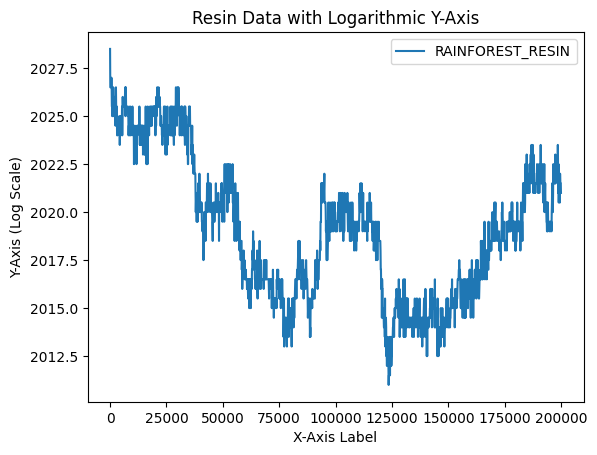

In [80]:
x_values = [i[0] for i in kelps][:2000]
y_values = [i[2] for i in kelps][:2000]

# Plot with markers ('o' for dots) and lines ('-' for connections)
plt.plot(x_values, y_values, label='RAINFOREST_RESIN')

# Set y-axis to log scale
# plt.xscale('log')

# Labels and legend
plt.xlabel("X-Axis Label")
plt.ylabel("Y-Axis (Log Scale)")
plt.legend()
plt.title("Resin Data with Logarithmic Y-Axis")

# Show plot
plt.show()

In [87]:
import re

# Define the regex pattern to match lambdaLog valu
def extract_log(p):
    pattern = r'"lambdaLog":\s*"([\d\.]+)"'

# Sample text (you would read this from the file instead)
    with open(p, "r") as file:
        log_data = file.read()

    # Find all matches
    lambda_log_values = re.findall(pattern, log_data)

    # Convert to float (if needed)
    lambda_log_values = [float(value) for value in lambda_log_values]

    # Print extracted values
    # print(lambda_log_values)
    return lambda_log_values


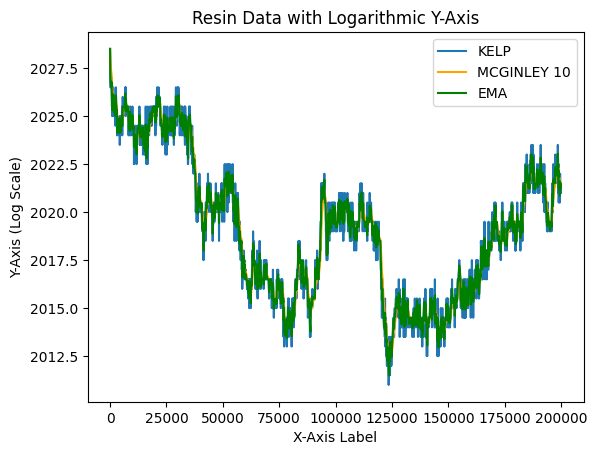

In [98]:
x_values = [i[0] for i in kelps]
y_values = [i[2] for i in kelps]

# Plot with markers ('o' for dots) and lines ('-' for connections)
plt.plot(x_values, y_values, label='KELP')
plt.plot(x_values, extract_log("mcg_log.txt"), label='MCGINLEY 10', color='orange')
plt.plot(x_values, extract_log("ema_log.txt"), label='EMA', color='green')
# plt.plot(x_values, [(m+e)/2 for m,e in zip(extract_log("mcg_log.txt"),extract_log("ema_log.txt"))][:100], label='avg', color='red')
# plt.plot(x_values, extract_log("mcg_20_log.txt"), label='MCGINLEY 20', color='red')
# Set y-axis to log scale
# plt.xscale('log')

# Labels and legend
plt.xlabel("X-Axis Label")
plt.ylabel("Y-Axis (Log Scale)")
plt.legend()
plt.title("Resin Data with Logarithmic Y-Axis")

# Show plot
plt.show()


In [100]:
resins

[(0, 'RAINFOREST_RESIN', 10003.0),
 (100, 'RAINFOREST_RESIN', 10000.0),
 (200, 'RAINFOREST_RESIN', 10000.0),
 (300, 'RAINFOREST_RESIN', 10000.0),
 (400, 'RAINFOREST_RESIN', 10000.0),
 (500, 'RAINFOREST_RESIN', 9998.5),
 (600, 'RAINFOREST_RESIN', 10002.5),
 (700, 'RAINFOREST_RESIN', 10000.0),
 (800, 'RAINFOREST_RESIN', 10000.0),
 (900, 'RAINFOREST_RESIN', 10000.0),
 (1000, 'RAINFOREST_RESIN', 10000.0),
 (1100, 'RAINFOREST_RESIN', 10000.0),
 (1200, 'RAINFOREST_RESIN', 9996.5),
 (1300, 'RAINFOREST_RESIN', 10003.0),
 (1400, 'RAINFOREST_RESIN', 10000.0),
 (1500, 'RAINFOREST_RESIN', 10000.0),
 (1600, 'RAINFOREST_RESIN', 10000.0),
 (1700, 'RAINFOREST_RESIN', 9999.0),
 (1800, 'RAINFOREST_RESIN', 10003.0),
 (1900, 'RAINFOREST_RESIN', 10000.0),
 (2000, 'RAINFOREST_RESIN', 9997.0),
 (2100, 'RAINFOREST_RESIN', 9999.0),
 (2200, 'RAINFOREST_RESIN', 10001.0),
 (2300, 'RAINFOREST_RESIN', 10001.0),
 (2400, 'RAINFOREST_RESIN', 10000.0),
 (2500, 'RAINFOREST_RESIN', 10000.0),
 (2600, 'RAINFOREST_RESIN', 1

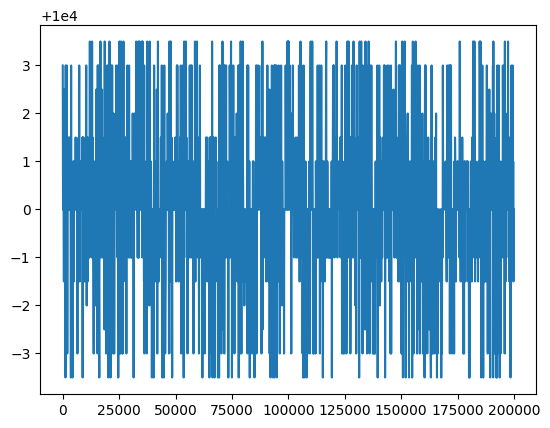

In [101]:
plt.plot(x_values,[resin[-1] for resin in resins],label='RAINFOREST_RESIN')